In [1]:
import utils
import matplotlib.pyplot as plt
from task2a import pre_process_images, one_hot_encode, SoftmaxModel
from task2 import SoftmaxTrainer

In [2]:
# hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
num_epochs = 50
learning_rate = .1
batch_size = 32
neurons_per_layer = [64, 10]
momentum_gamma = .9  # Task 3 hyperparameter
shuffle_data = True

# Load dataset
X_train, Y_train, X_val, Y_val = utils.load_full_mnist()
X_train = pre_process_images(X_train)
X_val = pre_process_images(X_val)
Y_train = one_hot_encode(Y_train, 10)
Y_val = one_hot_encode(Y_val, 10)

def train_base_model():
    use_improved_sigmoid = False
    use_improved_weight_init = False
    use_momentum = False
    use_relu = False
    model = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init,
        use_relu)
    trainer = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)
    return train_history, val_history

Train shape: X: (20000, 784), Y: (20000, 1)
Validation shape: X: (10000, 784), Y: (10000, 1)
mean = 33.55274553571429, std = 78.87550070784701
mean = 33.791224489795916, std = 79.17246322228644


In [3]:
def improve_model(use_improved_weight_init = False, use_improved_sigmoid = False,  use_momentum = False):
# Train a new model with new parameters
    use_relu = False
    model_improved = SoftmaxModel(
        neurons_per_layer,
        use_improved_sigmoid,
        use_improved_weight_init,
        use_relu)
    trainer_improved = SoftmaxTrainer(
        momentum_gamma, use_momentum,
        model_improved, learning_rate, batch_size, shuffle_data,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_improved, val_history_improved= trainer_improved.train(
        num_epochs)
    
    return train_history_improved, val_history_improved

In [4]:
def compare_plot(train_history, val_history, train_history_improved, val_history_improved, description: str):
    plt.subplot(1, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    utils.plot_loss(
        train_history_improved["loss"], description, npoints_to_average=10)
    plt.ylim([0, .4])
    plt.subplot(1, 2, 2)
    plt.ylim([0.85, 1])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    utils.plot_loss(
        val_history_improved["accuracy"], description)
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()


In [ ]:
def compare_all_plots(train_history, val_history, train_histories_improved: list, val_histories_improved:list):
    plt.subplot(1, 2, 1)
    utils.plot_loss(train_history["loss"],
                    "Task 2 Model", npoints_to_average=10)
    for train_history_improved in train_histories_improved:
        utils.plot_loss(
            train_history_improved["loss"], train_history_improved["Description"], npoints_to_average=10)
    plt.ylim([0, .4])
    plt.subplot(1, 2, 2)
    plt.ylim([0.85, 1])
    utils.plot_loss(val_history["accuracy"], "Task 2 Model")
    for val_history_improved in val_histories_improved:
        utils.plot_loss(
            val_history_improved["accuracy"], val_history_improved["Description"])
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.show()

In [7]:
train_history, val_history = train_base_model()

Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stopping at epoch 29875


In [ ]:
train_history_improved_weight_init, val_history_improved_weight_init = improve_model(use_improved_weight_init=True)
train_history_improved_weight_init["Description"] = "Improved weight init"
val_history_improved_weight_init["Description"] = "Improved weight init"

In [ ]:
train_history_improved_sigmoid, val_history_improved_sigmoid = improve_model(use_improved_weight_init=True, use_improved_sigmoid=True)
train_history_improved_sigmoid["Description"] = "Improved sigmoid"
val_history_improved_sigmoid["Description"] = "Improved sigmoid"

In [8]:
train_history_momentum, val_history_momentum = improve_model(use_improved_weight_init=True, use_improved_sigmoid=True, use_momentum = True)
train_history_momentum["Description"] = "Momentum"
val_history_momentum["Description"] = "Momentum"

Initializing weight to shape: (785, 64)
Initializing weight to shape: (64, 10)
Early stopping at epoch 22750


In [ ]:
compare_plot(train_history, val_history, train_history_improved_weight_init, val_history_improved_weight_init, "Improved weight init")

In [ ]:
compare_plot(train_history, val_history, train_history_improved_sigmoid, val_history_improved_sigmoid, "Improved sigmoid")

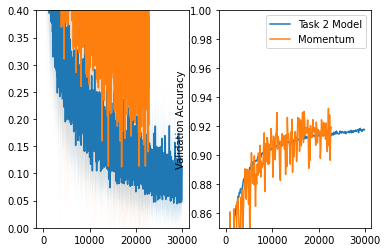

In [9]:
compare_plot(train_history, val_history, train_history_momentum, val_history_momentum, "Momentum")